In [127]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
df = pd.read_csv('datasets/train.csv',usecols=['Age','Fare','Survived'])

In [129]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [130]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [131]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [132]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [133]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [134]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [135]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [136]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [137]:
X_train['Age'].isnull().sum()

148

In [138]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,30.0
493,71.0,49.5042,71.0
527,NaN,221.7792,17.0


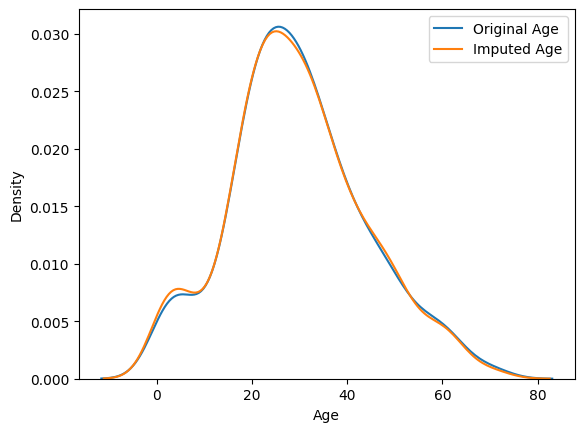

In [139]:
sns.kdeplot(data=X_train['Age'], label='Original Age')
sns.kdeplot(data=X_train['Age_imputed'], label='Imputed Age')

plt.legend()
plt.show()

In [140]:
print('Original variable variance:', X_train['Age'].var())
print('Variable variance after random imputation:', X_train['Age_imputed'].var())

Original variable variance: 204.34951339046142
Variable variance after random imputation: 205.15883871090725


In [141]:
X_train[['Age', 'Fare', 'Age_imputed']].cov()

,Age,Fare,Age_imputed
Age,204.349513,71.512440,204.349513
Fare,71.512440,2368.246832,51.134527
Age_imputed,204.349513,51.134527,205.158839


<Axes: >

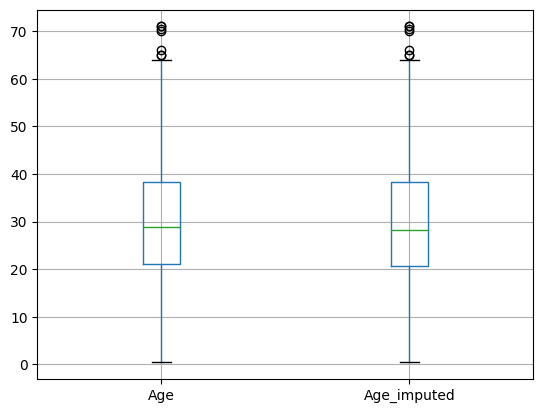

In [142]:
X_train[['Age',  'Age_imputed']].boxplot()

In [147]:
# sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

In [148]:
data = pd.read_csv('datasets/housing_train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [149]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [154]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [162]:
X = data
y = data['SalePrice']

In [163]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [164]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [165]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
636,Po,NaN,60000,NaN,Po
799,TA,TA,175000,TA,TA
1398,NaN,TA,138000,TA,NaN
647,Gd,TA,155000,TA,Gd
1197,Gd,TA,144000,TA,Gd


In [161]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()]=X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()]=X_test['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()]=X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()]=X_test['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\Pappu\AppData\Local\Temp\ipykernel_9724\4256300880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()]=X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
C:\Users\Pappu\AppData\Local\Temp\ipykernel_9724\4256300880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()]=X_test['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
C:\Users\Pappu\AppData\Local\Temp\ipykernel_9724\4256300880.py:4: SettingWithCopyWarning: 
A value i

In [171]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [172]:
temp

,original,imputed
TA,0.951043,0.898116
Fa,0.037171,0.035103
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [173]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [174]:
temp

,original,imputed
Gd,0.494272,0.258562
TA,0.412439,0.215753
Fa,0.040917,0.021404
Po,0.027823,0.014555
Ex,0.024550,0.012842


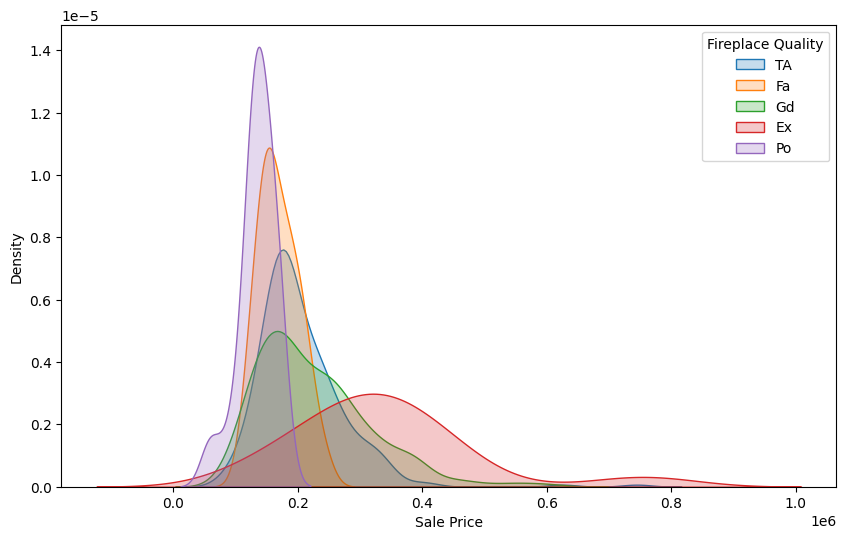

In [194]:
plt.figure(figsize=(10, 6))

# Loop through each category and plot KDE
for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(
        data=X_train[X_train['FireplaceQu'] == category]['SalePrice'],
        label=category,
        fill=True,  # Adds shading under the curve
        common_norm=False  # Ensures each KDE is scaled independently
    )

# Add title and labels
plt.xlabel('Sale Price')
plt.ylabel('Density')

# Add legend
plt.legend(title='Fireplace Quality')

# Show the plot
plt.show()


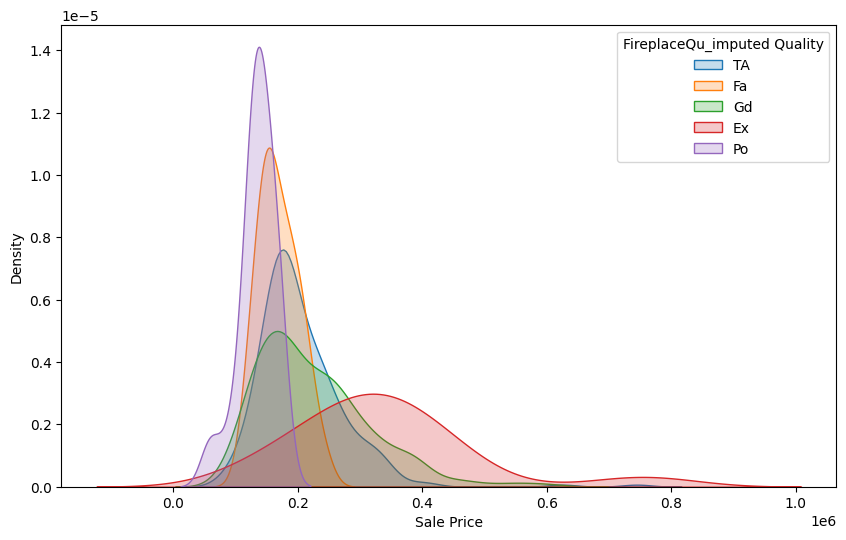

In [195]:
plt.figure(figsize=(10, 6))

# Loop through each category and plot KDE
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(
        data=X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],
        label=category,
        fill=True,  # Adds shading under the curve
        common_norm=False  # Ensures each KDE is scaled independently
    )

# Add title and labels
plt.xlabel('Sale Price')
plt.ylabel('Density')

# Add legend
plt.legend(title='FireplaceQu_imputed Quality')

# Show the plot
plt.show()
